## Interactive thermal X-ray emission
Interactive function to plot pre-generated X-ray models.<br/>
A grid of models were generated with the fakeit command with Xspec (see script make_fakeNEI.sh).<br/>

Each model can be seen through the XMM MOS CCD camera or the next generation Athena-XIFU micro-calorimeter instrument.<br/>

To execute a cell: select a cell then press the play button in the tool bar above or hit Shift-Enter.

In [5]:
%matplotlib inline
#%config InlineBackend.figure_format = 'retina'

# futur division is very important for exponent: 1/2 = 0.5 and not 0
from __future__ import  division, print_function
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator, FormatStrFormatter
import numpy as np
from ipywidgets.widgets.interaction import interact
from pandas import read_csv


xFormatter = FormatStrFormatter('%s')

lines_dict={'O VII': 0.561, 'O VIII': 0.653, 'Ne IX': 0.922, 'Ne X': 1.021,
            'Mg XI': 1.352, 'Mg XII': 1.473, 'Si XIII': 1.839, 'Si XIV': 2.004}


inst_list=['XMM-MOS','Athena-XIFU']
abund_list=['SOLAR', 'FE']
def plot_spec(nh=1.0, kT=1.0, logtau=9,ylog=True,line_id=True,instrument=inst_list,abund=abund_list):
    """
    Plot X-ray spectra model from a grid a pre-computed Xspec models.
    The input parameters are:
    nh: absorption along the line of sight in 10^22 cm-2
    kT: plasma temperature in keV
    logtau: Log of ionization parameter tau in cm-3 s
    
    
    """
    
    my_file = 'data/%s/xspec_nei_%s_nh%s_kT%s_tau1e%s.dat.gz'%(instrument, abund, nh, kT, logtau)
    
    data=read_csv(my_file,skiprows=10,delimiter=' ', names=['E','model']) 
    #E=np.array( data['E'] )    
    E, model = data['E'], data['model']
    
    title=r'nH= %sx10$^{22}$ cm$^{-2}$   kT=%s keV   tau=10$^{%s}$ cm$^{-3}$ s Abund=%s'%( nh, kT, logtau,abund)
    fig, ax = plt.subplots(1, 1, figsize=(12,6))

    ax.plot(E, model)
    
    if line_id:
        for i,line in enumerate(lines_dict.iterkeys()):
            ax.axvline(x=lines_dict[line],linestyle=':')
            ax.text(lines_dict[line],1.0/(i+1),' '+line)
        
    
    if ylog : ax.set_yscale('log')
    ax.set_xscale('log')
    
    ax.set_xlim(0.45,9.1)
    ax.set_ylim(3e-2,3e4)
    
    ax.set_xticks([0.5, 1, 3, 9])
    ax.xaxis.set_major_formatter(xFormatter)
    ax.set_xlabel('Energy (keV)',fontsize=15)
    ax.set_ylabel('Counts / s / keV',fontsize=15)
    ax.set_title(title,fontsize=15)
    
    plt.show()

    

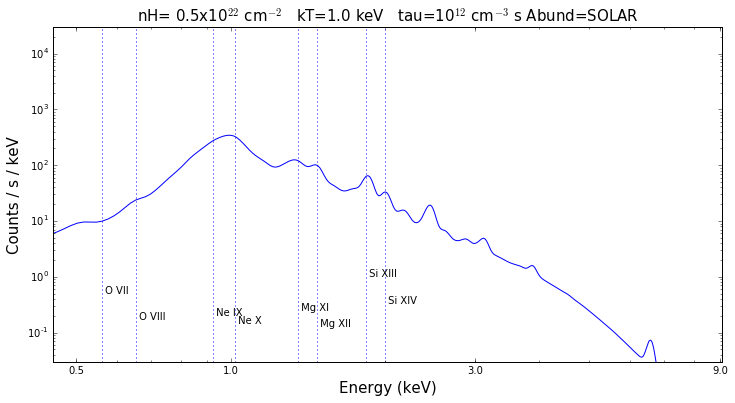

None

In [4]:
interact(plot_spec,nh=(0.5,2,0.5), kT=(0.5,4,0.5), logtau=(8,13,1))